In [16]:
# General libraries
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

# Scikit Learn libraries
from sklearn.model_selection import train_test_split

# Utils functions
from utils.utils import compare_models, plot_score_dist, compare_confidence_intervals, five_two, read_datasets

In [17]:
x_train, x_test, y_train, y_test = read_datasets(
    'x_train.csv',
    'x_test.csv',
    'y_train.csv',
    'y_test.csv'
)

In [18]:
def load_model(model):
    models_folder = '../models/'
    return joblib.load(models_folder + model + '_model.joblib')

In [19]:
#1000 to 10.000 did not show significative differences
#size 2270 based on the paper: https://www.econstor.eu/bitstream/10419/67820/1/587473266.pdf
random_state_list = list(np.random.randint(low = 1,high=5000,size=2270))

## Linear Regression VS SVR

In [20]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = 0.003335
Fold  2 score difference = -0.132111
Fold  1 score difference = -0.112742
Fold  2 score difference = -0.129562
Fold  1 score difference = -0.235012
Fold  2 score difference = -0.104680
Fold  1 score difference = -0.029242
Fold  2 score difference = -0.096055
Fold  1 score difference = -0.172113
Fold  2 score difference = -0.105608
Regression 1 mean score and stdev : 0.044218 + 0.075158
Regression 2 mean score and stdev : 0.155597 + 0.047330
Score difference mean + stdev : -0.111379 + 0.063210
t_value for the current test is 0.049986


mean_score_1 0.0019224943051031197, std 0.11266792270454377
mean_score_2 0.1765717997805275, std 0.10227471545604397
Ttest_relResult(statistic=-98.13037704399095, pvalue=0.0)
P value menor ou igual a 0.05


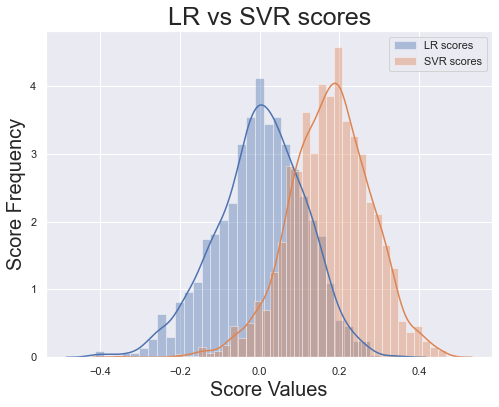

In [21]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('svr'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)


plot_score_dist(reg1_scores, reg2_scores, 'LR', 'SVR')

In [22]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.24328327253984106
0.20567476864859252
-0.039196559569001095
0.37461000462092275


## Linear Regression VS XGBoost

In [23]:
five_two(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = -0.043787
Fold  2 score difference = -0.132095
Fold  1 score difference = -0.133675
Fold  2 score difference = 0.001475
Fold  1 score difference = -0.146327
Fold  2 score difference = -0.109841
Fold  1 score difference = -0.002062
Fold  2 score difference = -0.033318
Fold  1 score difference = -0.204415
Fold  2 score difference = -0.092437
Regression 1 mean score and stdev : 0.044218 + 0.075158
Regression 2 mean score and stdev : 0.133866 + 0.036905
Score difference mean + stdev : -0.089648 + 0.064646
t_value for the current test is -0.684584


mean_score_1 0.0019224943051031197, std 0.11266792270454377
mean_score_2 0.23942953563320796, std 0.08311551867135568
Ttest_relResult(statistic=-136.31882972986926, pvalue=0.0)
P value menor ou igual a 0.05


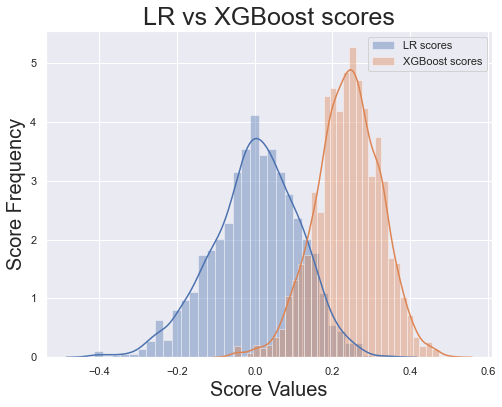

In [24]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('lr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'LR', 'XGBoost')

In [25]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.24328327253984106
0.20567476864859252
0.07172180727012303
0.39741288425638166


## SVR VS XGboost

In [26]:
five_two(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_train.copy(),
    y=y_train.copy(),
    metric='default'
    )

Fold  1 score difference = -0.047122
Fold  2 score difference = 0.000016
Fold  1 score difference = -0.020933
Fold  2 score difference = 0.131037
Fold  1 score difference = 0.088685
Fold  2 score difference = -0.005161
Fold  1 score difference = 0.027180
Fold  2 score difference = 0.062737
Fold  1 score difference = -0.032302
Fold  2 score difference = 0.013171
Regression 1 mean score and stdev : 0.155597 + 0.047330
Regression 2 mean score and stdev : 0.133866 + 0.036905
Score difference mean + stdev : 0.021731 + 0.053750
t_value for the current test is -0.769944


mean_score_1 0.1765717997805275, std 0.10227471545604397
mean_score_2 0.23942953563320796, std 0.08311551867135568
Ttest_relResult(statistic=-49.72389674868662, pvalue=0.0)
P value menor ou igual a 0.05


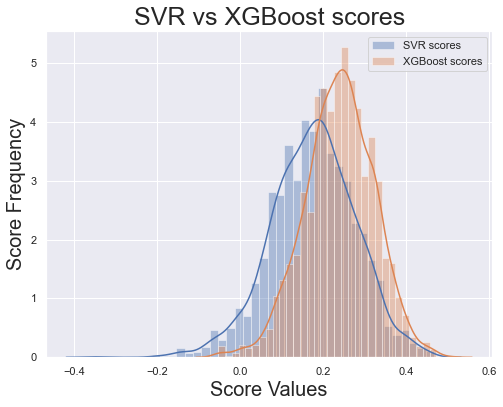

In [27]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [28]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-0.039196559569001095
0.37461000462092275
0.07172180727012303
0.39741288425638166


mean_score_1 -0.667969944034316, std 0.20717185951352496
mean_score_2 -0.5406427355122198, std 0.16836220448813075
Ttest_relResult(statistic=-49.72389674868663, pvalue=0.0)
P value menor ou igual a 0.05


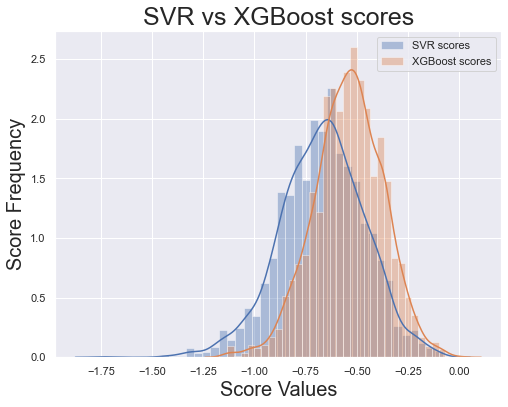

In [29]:
reg1_scores, reg2_scores = compare_models(
    reg1=load_model('svr'),
    reg2=load_model('xgboost'),
    X=x_test.copy(),
    y=y_test.copy(),
    metric="adj_r2",
    random_state_list = random_state_list
)

plot_score_dist(reg1_scores, reg2_scores, 'SVR', 'XGBoost')

In [30]:
compare_confidence_intervals(
    reg1_scores, reg2_scores,
    lower=2.5, upper=97.5
)

-1.1050391847679766
-0.2668156316653103
-0.8803583904015455
-0.22062518317297045
